C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


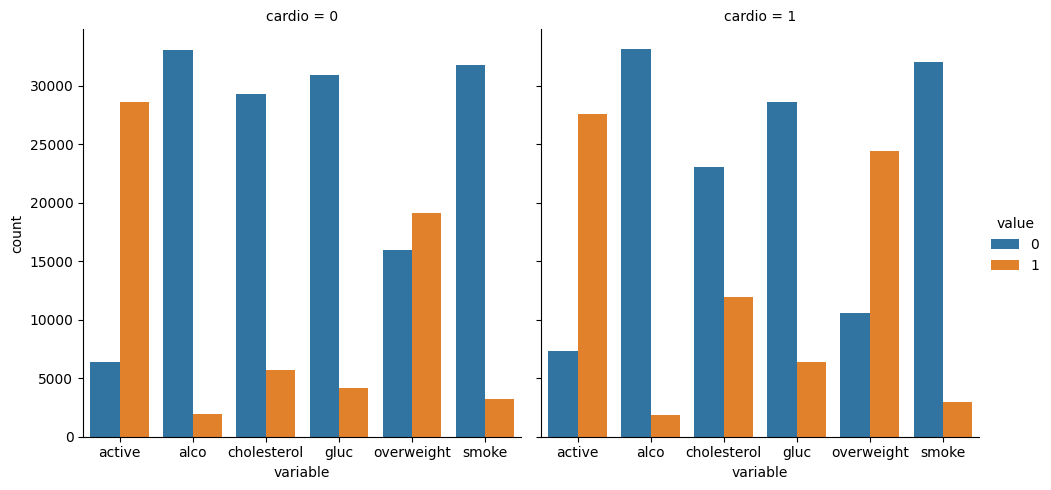

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('medical_examination.csv')
df['overweight']=np.where(df.weight/(df.height/100)**2>25,1,0)
df['cholesterol']=np.where(df.cholesterol==1,0,1)
df['gluc']=np.where(df.gluc==1,0,1)
df_cat=df.melt(id_vars='cardio',value_vars=sorted(['cholesterol','gluc','smoke','alco','active','overweight']))
g=sns.catplot(data=df_cat,kind='count',x='variable',hue='value',col='cardio')
df_heat=df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))
          &(df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]
corr_matrix=df_heat.corr()
mask=np.triu(corr_matrix)


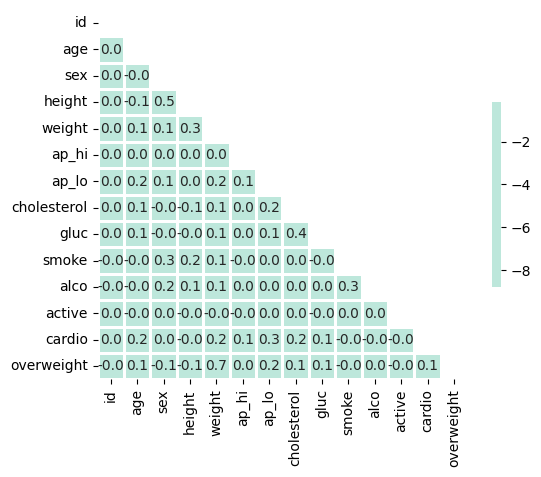

In [52]:
ax=sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=1,mask=mask,vmax=-8,center=0.09,square=True,cbar_kws={'shrink':0.5})